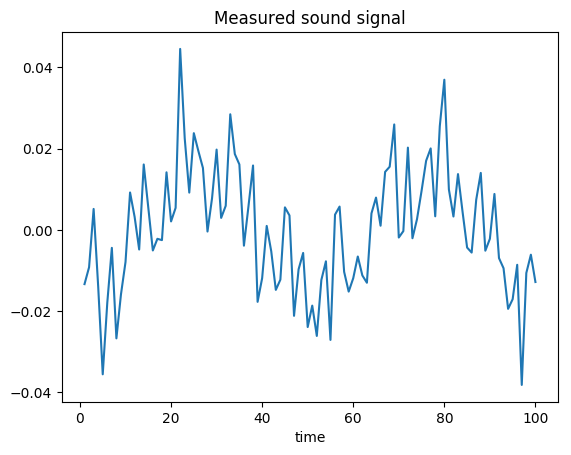

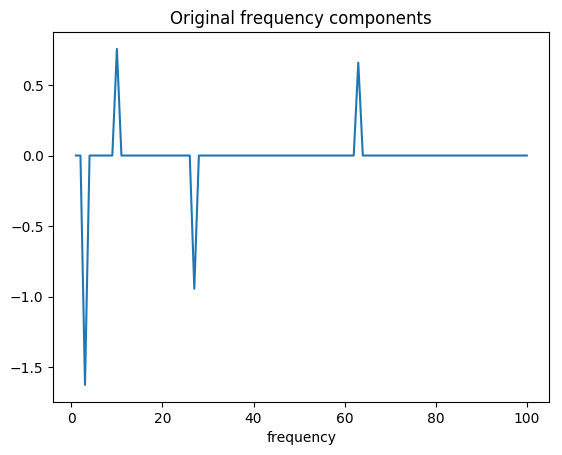

In [8]:
using PyPlot;

srand(1);

n = 100;

x = zeros(n);
sel = randperm(n);
x[sel[1:4]] = randn(4);

dftmtx = fft(eye(n,n),1);
A = inv(dftmtx);

y_true = A*x;
y = y_true + 0.004*randn(n); 

figure();
plot(1:n, y);
title("Measured sound signal");
xlabel("time");

figure();
plot(1:n, x);
xlabel("frequency");
title("Original frequency components");



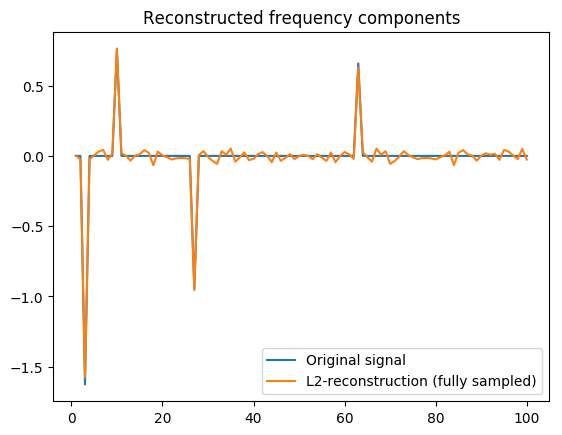

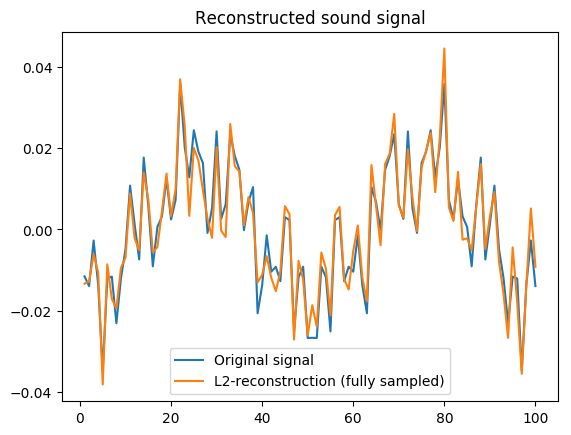

In [16]:
# fully sampled case

xhat = A\y;
figure();
plot(1:n, x, label="Original signal");
plot(1:n, xhat, label="L2-reconstruction (fully sampled)");
legend();
title("Reconstructed frequency components");

figure();
plot(1:n, y_true, label="Original signal");
plot(1:n, dftmtx*xhat/n, label="L2-reconstruction (fully sampled)");
legend();
title("Reconstructed sound signal");


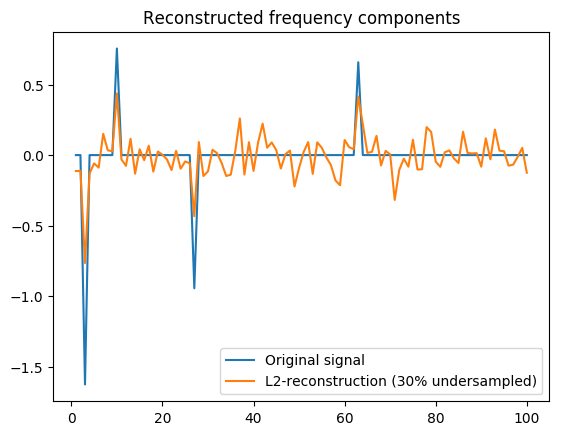

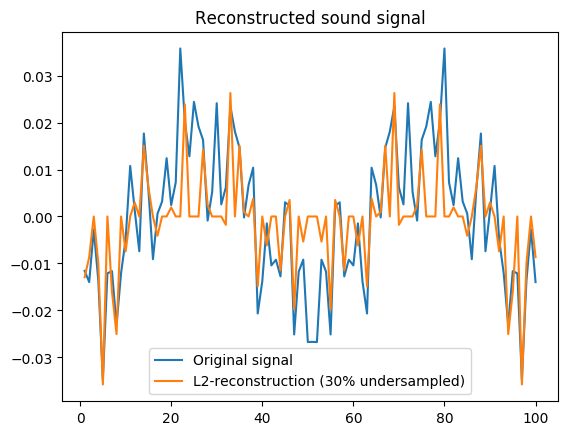


ECOS 2.0.5 - (C) embotech GmbH, Zurich Switzerland, 2012-15. Web: www.embotech.com/ECOS

It     pcost       dcost      gap   pres   dres    k/t    mu     step   sigma     IR    |   BT
 0  +0.000e+00  -1.322e+00  +7e+00  5e-01  1e-01  1e+00  2e+00    ---    ---    1  1  - |  -  - 
 1  -4.629e-02  -1.310e-01  +7e-01  1e-02  8e-03  8e-02  2e-01  0.9141  3e-02   1  1  1 |  0  0
 2  +2.278e-03  -5.755e-03  +7e-02  3e-03  5e-04  5e-03  2e-02  0.9061  4e-03   1  1  1 |  0  0
 3  -5.945e-04  -3.770e-03  +3e-02  1e-03  2e-04  2e-03  7e-03  0.8208  3e-01   1  1  1 |  0  0
 4  +1.531e-03  +1.172e-03  +3e-03  1e-04  2e-05  2e-04  8e-04  0.9429  6e-02   1  1  1 |  0  0
 5  +1.525e-03  +1.493e-03  +3e-04  1e-05  2e-06  2e-05  7e-05  0.9717  6e-02   1  1  1 |  0  0
 6  +1.543e-03  +1.542e-03  +8e-06  4e-07  6e-08  5e-07  2e-06  0.9696  1e-04   1  1  1 |  0  0
 7  +1.543e-03  +1.543e-03  +5e-07  2e-08  3e-09  3e-08  1e-07  0.9436  8e-04   1  1  1 |  0  0
 8  +1.543e-03  +1.543e-03  +4e-08  2e-09  3e-

In [17]:
# underdetermined case (randomly take 30% of samples), Tykhonov reg.

using Convex, ECOS

m2 = round(Int64, 0.3*n);
sel = randperm(n);

y2 = y[sel[1:m2]];
A2 = A[sel[1:m2],:];

xh = Variable(n);
#objective = norm(A2*xh-y2)^2 +1.4e-3*sum(abs(xh));
objective = norm(A2*xh-y2)^2 +1e-3*norm(xh);
problem = minimize(objective);
solve!(problem);
xhat2 = evaluate(xh);

figure();
plot(1:n, x, label="Original signal");
plot(1:n, xhat2, label="L2-reconstruction (30% undersampled)");
legend();
title("Reconstructed frequency components");

figure();
plot(1:n, y_true, label="Original signal");
plot(1:n, dftmtx*xhat2/n, label="L2-reconstruction (30% undersampled)");
legend();
title("Reconstructed sound signal");


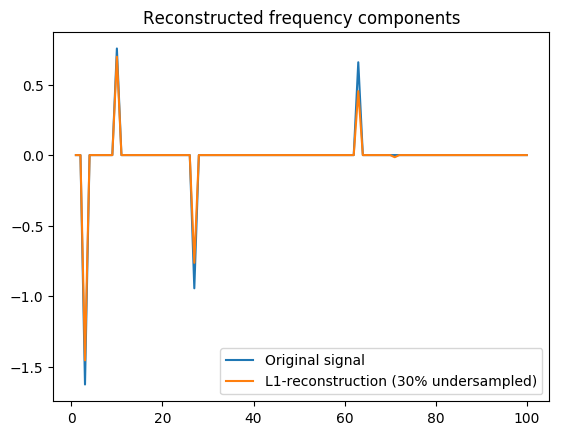

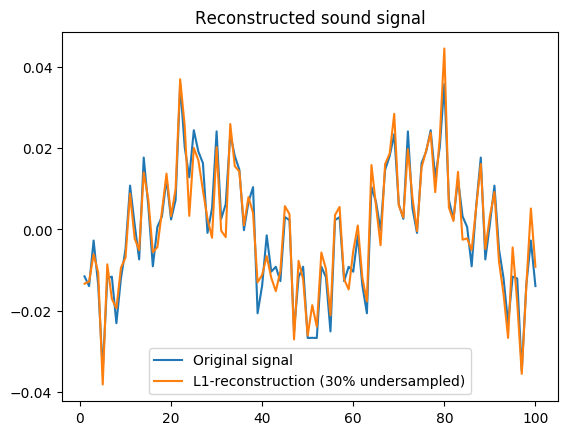


ECOS 2.0.5 - (C) embotech GmbH, Zurich Switzerland, 2012-15. Web: www.embotech.com/ECOS

It     pcost       dcost      gap   pres   dres    k/t    mu     step   sigma     IR    |   BT
 0  +0.000e+00  -1.322e+00  +2e+02  9e-01  1e+00  1e+00  1e+00    ---    ---    1  2  - |  -  - 
 1  -3.701e-02  -1.354e-01  +3e+01  4e-02  2e-01  8e-02  1e-01  0.9076  3e-02   1  1  1 |  0  0
 2  +3.164e-02  +7.717e-03  +7e+00  7e-03  3e-02  5e-03  3e-02  0.7583  2e-02   1  1  1 |  0  0
 3  +1.654e-02  +1.144e-02  +5e+00  2e-03  3e-03  2e-03  3e-02  0.3811  4e-01   1  1  1 |  0  0
 4  +1.208e-02  +7.732e-03  +4e+00  8e-04  2e-03  5e-04  2e-02  0.8376  6e-01   1  1  1 |  0  0
 5  +9.684e-03  +6.908e-03  +3e+00  4e-04  9e-04  4e-04  1e-02  0.3322  2e-01   1  1  1 |  0  0
 6  +6.846e-03  +5.519e-03  +2e+00  1e-04  3e-04  2e-04  1e-02  0.7282  7e-01   1  1  1 |  0  0
 7  +6.241e-03  +5.215e-03  +2e+00  9e-05  2e-04  1e-04  8e-03  0.3888  4e-01   1  1  1 |  0  0
 8  +6.016e-03  +5.186e-03  +1e+00  7e-05  2e-

In [18]:
# underdetermined case (randomly take 30% of samples), LASSO

using Convex, ECOS

xh = Variable(n);
objective = norm(A2*xh-y2)^2 +1e-3*sum(abs(xh));
problem = minimize(objective);
solve!(problem);
xhat2 = evaluate(xh);

figure();
plot(1:n, x, label="Original signal");
plot(1:n, xhat2, label="L1-reconstruction (30% undersampled)");
legend();
title("Reconstructed frequency components");

figure();
plot(1:n, y_true, label="Original signal");
plot(1:n, dftmtx*xhat/n, label="L1-reconstruction (30% undersampled)");
legend();
title("Reconstructed sound signal");
